# Project Overview:
The project revolves around predicting the likelihood of heart disease based on various medical and demographic factors. The dataset contains information such as age, sex, cholesterol levels, resting blood pressure, and other clinical attributes. Leveraging machine learning techniques, the goal is to develop a predictive model that can accurately classify individuals as either having or not having heart disease.

# Problem Statement:
The primary problem is to build a reliable predictive model to assist healthcare professionals in diagnosing heart disease at an early stage. By analyzing patient data, the model should accurately classify individuals into two categories: those who have heart disease and those who do not. This will enable proactive interventions and personalized treatments, ultimately leading to better patient outcomes and reduced healthcare costs.

# Main Objective:

To develop a robust machine learning model capable of accurately predicting the presence or absence of heart disease based on patient attributes. This model should achieve high performance metrics, indicating its effectiveness in aiding clinical decision-making.



# Specific Objectives:

1. To Prepare Data and visualize 

2. To Engineer Informative Features.

3. To Select and Train Models.

4. To Evaluate Model Performance.

5. To Deploy and Monitor Model.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action="ignore")
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [49]:

# Load the dataset using heart_disease as the variable name
heart_disease = pd.read_csv("Heart_data.csv")

# Display the first few rows of the DataFrame
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,NaN,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,NaN,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [50]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1592 entries, 0 to 1591
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1513 non-null   float64
 1   sex       1561 non-null   float64
 2   cp        1433 non-null   float64
 3   trestbps  1592 non-null   float64
 4   chol      1529 non-null   float64
 5   fbs       1513 non-null   float64
 6   restecg   1585 non-null   float64
 7   thalach   1592 non-null   float64
 8   exang     1545 non-null   float64
 9   oldpeak   1561 non-null   float64
 10  slope     1538 non-null   float64
 11  ca        1592 non-null   float64
 12  thal      1585 non-null   float64
 13  target    1592 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 174.3 KB


In [51]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1513.000000,1561.00000,1433.000000,1592.000000,1529.000000,1513.000000,1585.000000,1592.000000,1545.000000,1561.000000,1538.000000,1592.000000,1585.000000,1592.000000
mean,54.427627,0.68802,1.731333,131.581658,246.507521,0.147389,0.699685,149.300251,0.333981,1.066496,1.455787,0.725503,3.173502,0.751884
std,9.076772,0.46345,1.463610,17.610804,51.317002,0.354611,0.764196,23.007862,0.471786,1.171509,0.623490,1.000014,1.698798,0.782024
min,29.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.00000,2.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.00000,3.000000,140.000000,276.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,4.000000


# Data cleaning 
1. Handle missing values.
2. Remove duplicates.
3. Validate data types.
4. Address outliers.

In [52]:
heart_disease.isnull().sum()

age          79
sex          31
cp          159
trestbps      0
chol         63
fbs          79
restecg       7
thalach       0
exang        47
oldpeak      31
slope        54
ca            0
thal          7
target        0
dtype: int64

In [53]:
import pandas as pd


heart_disease.dropna(inplace=True)

# Check the shape of the DataFrame after dropping missing values
print("Shape after dropping missing values:", heart_disease.shape)


Shape after dropping missing values: (1113, 14)


there 10 columns with missing values which will be replaced by the mean (nmerical values) and mode (categorical columns) 

In [54]:
import pandas as pd

# Assuming heart_disease is your DataFrame
heart_disease_cleaned = heart_disease.dropna()

# Printing the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", heart_disease_cleaned.shape)


Shape of cleaned DataFrame: (1113, 14)


In [55]:
# Check for duplicate rows
duplicate_rows =heart_disease_cleaned .duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 444


In [10]:
# Remove duplicate rows
heart_disease.drop_duplicates(inplace=True)

# Verify that duplicate rows have been removed
print("Number of duplicate rows after removal:", heart_disease.duplicated().sum())


Number of duplicate rows after removal: 0


In [57]:
import pandas as pd

# Assuming heart_disease is your DataFrame
heart_disease_cleaned = heart_disease.dropna()

# Printing the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", heart_disease_cleaned.shape)

# Save the cleaned DataFrame as a CSV file
heart_disease_cleaned.to_csv('heart_disease_cleaned.csv', index=False)


Shape of cleaned DataFrame: (1113, 14)


In [11]:
# Define expected data types for each column
expected_dtypes = {
    'age': 'float64',   # Example: 'float64' for float
    'sex': 'float64',   # Example: 'float64' for float
    'cp': 'float64',    # Example: 'float64' for float
    'trestbps': 'float64',
    'chol': 'float64',
    'fbs': 'float64',
    'restecg': 'float64',
    'thalach': 'float64',
    'exang': 'float64',
    'oldpeak': 'float64',
    'slope': 'float64',
    'ca': 'float64',
    'thal': 'float64',
    'target': 'int64'    # Example: 'int64' for integer
}

# Check if the data types match the expected types
for column, expected_type in expected_dtypes.items():
    if heart_disease[column].dtype != expected_type:
        print(f"Data type mismatch for column '{column}': Expected '{expected_type}', Found '{heart_disease[column].dtype}'")
    else:
        print(f"Data type for column '{column}' is correct: '{expected_type}'")


Data type for column 'age' is correct: 'float64'
Data type for column 'sex' is correct: 'float64'
Data type for column 'cp' is correct: 'float64'
Data type for column 'trestbps' is correct: 'float64'
Data type for column 'chol' is correct: 'float64'
Data type for column 'fbs' is correct: 'float64'
Data type for column 'restecg' is correct: 'float64'
Data type for column 'thalach' is correct: 'float64'
Data type for column 'exang' is correct: 'float64'
Data type for column 'oldpeak' is correct: 'float64'
Data type for column 'slope' is correct: 'float64'
Data type for column 'ca' is correct: 'float64'
Data type for column 'thal' is correct: 'float64'
Data type for column 'target' is correct: 'int64'


In [47]:
heart_disease_cleaned.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3


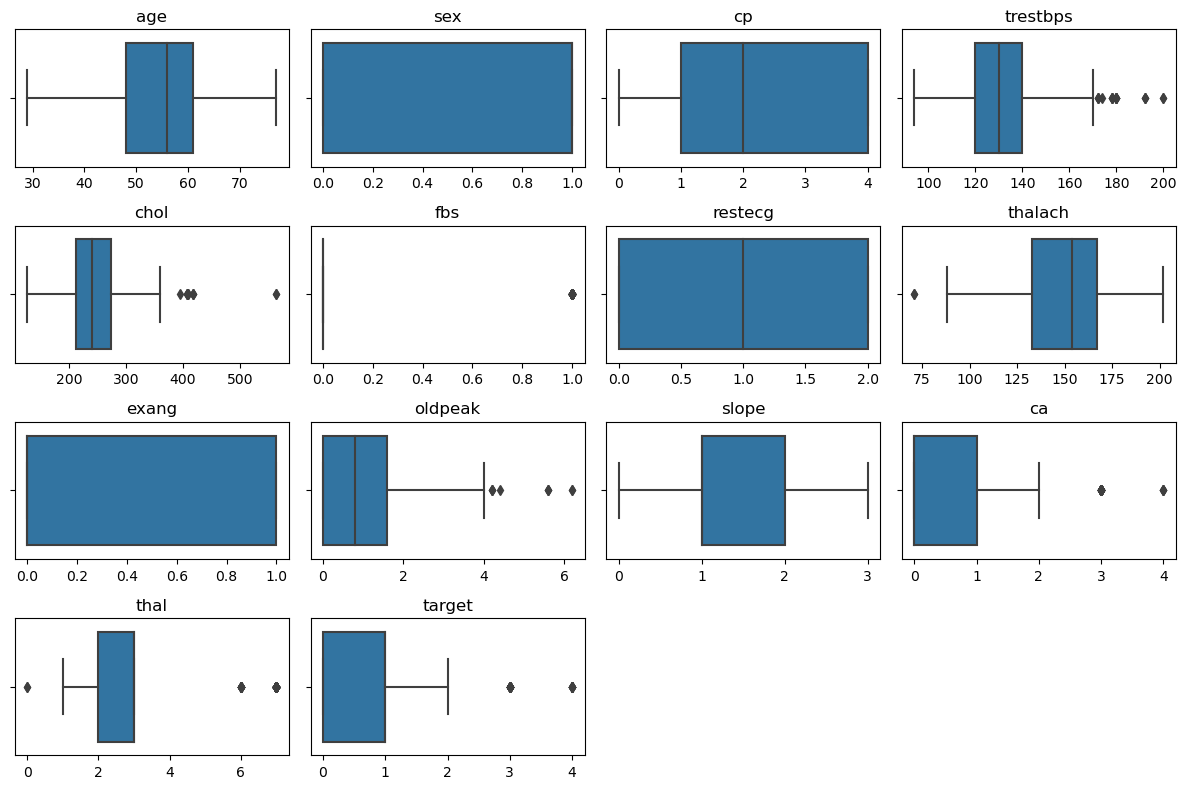

In [13]:
# Define the columns of interest
columns_of_interest = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create boxplots for each column
plt.figure(figsize=(12, 8))
for column in columns_of_interest:
    plt.subplot(4, 4, columns_of_interest.index(column) + 1)
    sns.boxplot(x=heart_disease[column])
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


# Data Analysis

Univariate Analysis

In [14]:
# Find the value counts for the 'target' column
target_value_counts = heart_disease_cleaned['target'].value_counts()

# Print the value counts
print("Value Counts for 'target' column:")
print(target_value_counts)


Value Counts for 'target' column:
target
1    503
0    463
2    109
3     28
4     10
Name: count, dtype: int64


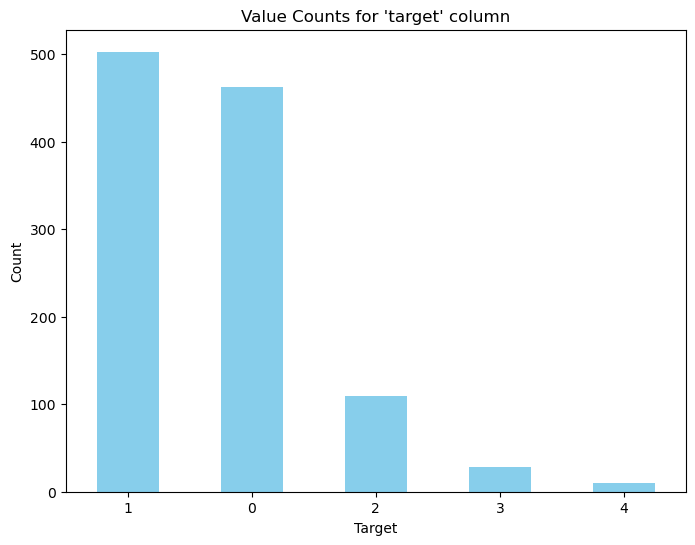

In [15]:

# Plotting
plt.figure(figsize=(8, 6))
target_value_counts.plot(kind='bar', color='skyblue')
plt.title("Value Counts for 'target' column")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.show()


most have a value count of 1,0 being the second and 4 being the list .

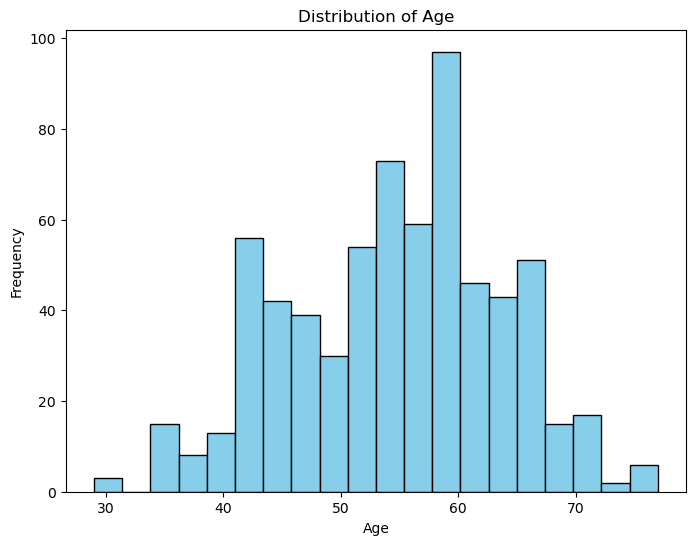

In [16]:
#Age
plt.figure(figsize=(8, 6))
heart_disease['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


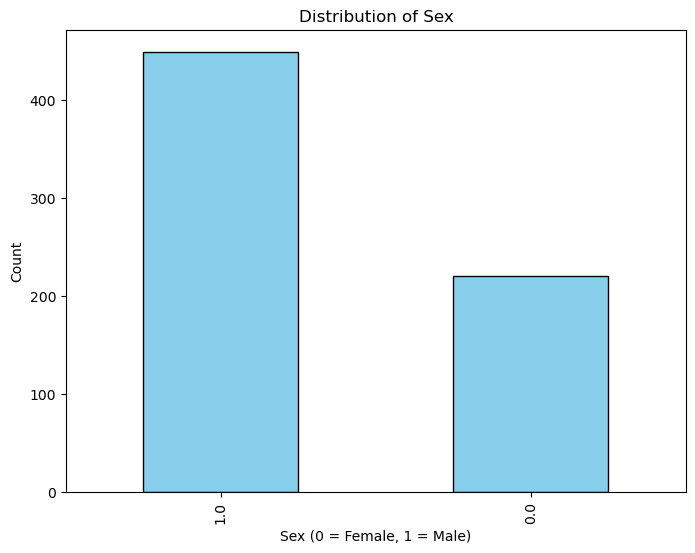

In [17]:
#Sex
plt.figure(figsize=(8, 6))
heart_disease['sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


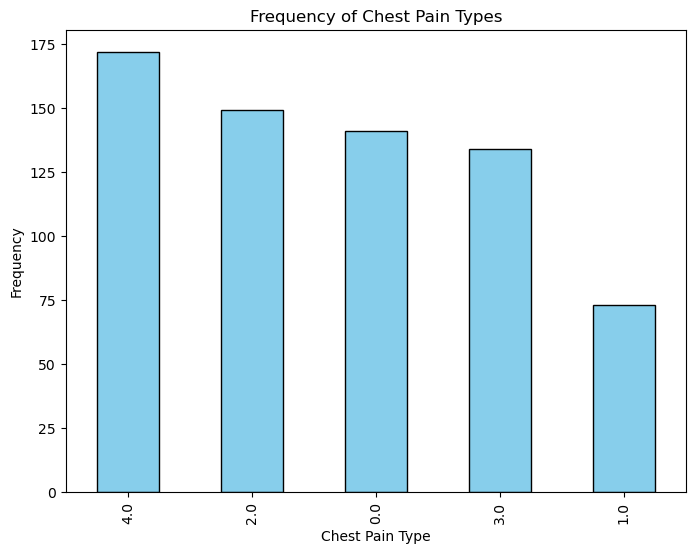

In [18]:
#Chest Pain (cp)
plt.figure(figsize=(8, 6))
heart_disease['cp'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.show()

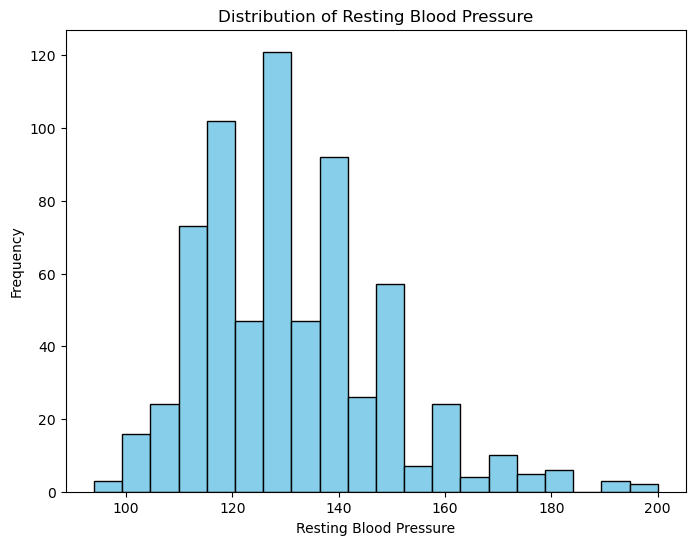

In [19]:
#Resting Blood Pressure (trestbps)
plt.figure(figsize=(8, 6))
heart_disease['trestbps'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.show()


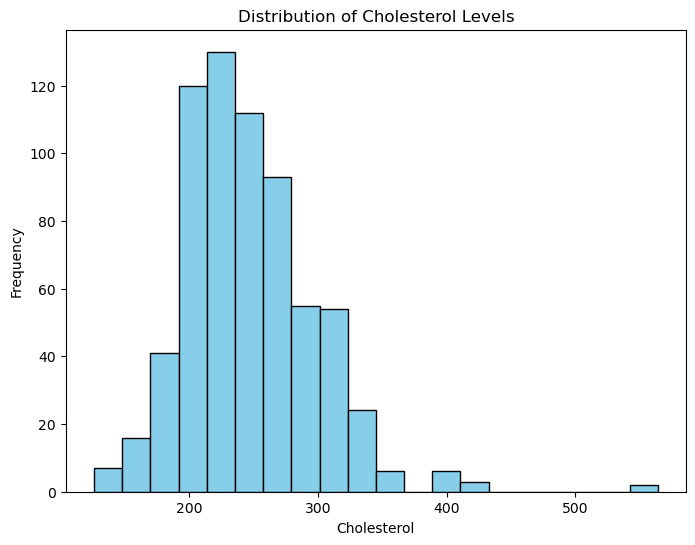

In [20]:
# Cholesterol (chol)
plt.figure(figsize=(8, 6))
heart_disease['chol'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()

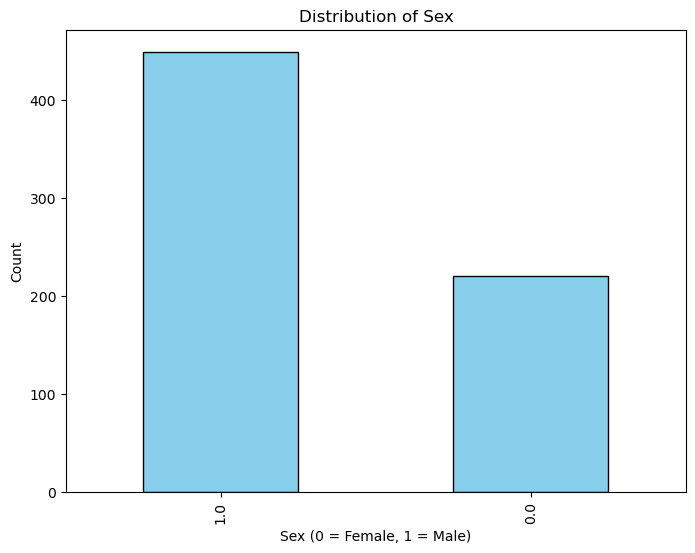

In [21]:
plt.figure(figsize=(8, 6))
heart_disease['sex'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Sex")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.show()


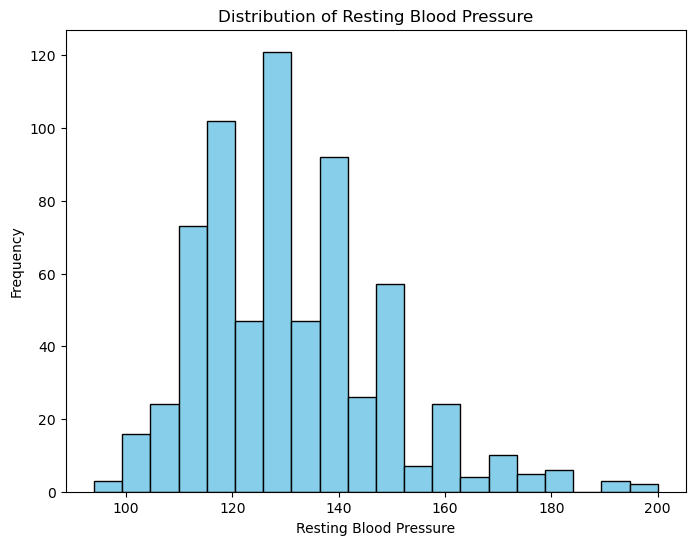

In [22]:
plt.figure(figsize=(8, 6))
heart_disease['trestbps'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Resting Blood Pressure")
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.show()


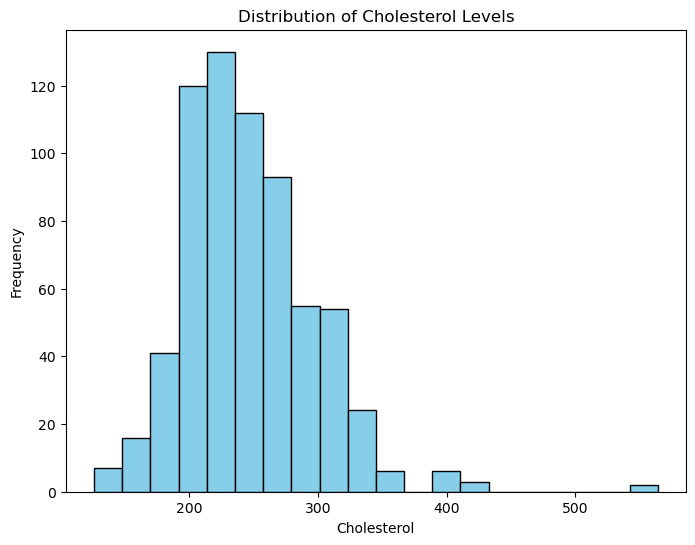

In [23]:
plt.figure(figsize=(8, 6))
heart_disease['chol'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()


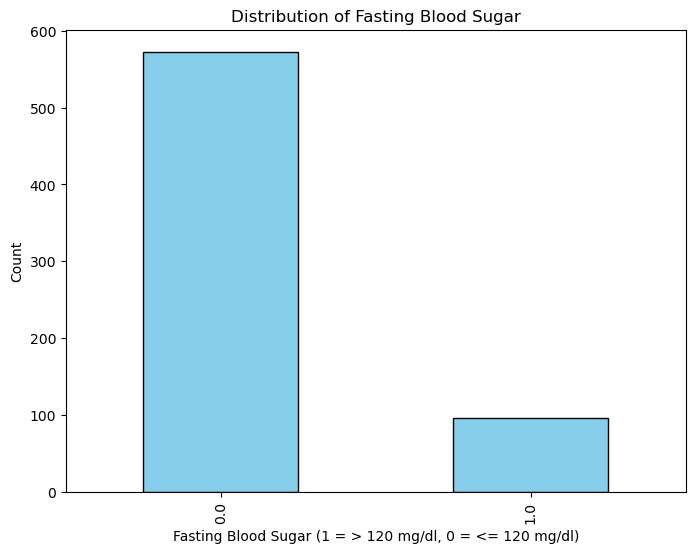

In [24]:
# Fasting Blood Sugar (fbs)
plt.figure(figsize=(8, 6))
heart_disease['fbs'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Fasting Blood Sugar")
plt.xlabel("Fasting Blood Sugar (1 = > 120 mg/dl, 0 = <= 120 mg/dl)")
plt.ylabel("Count")
plt.show()

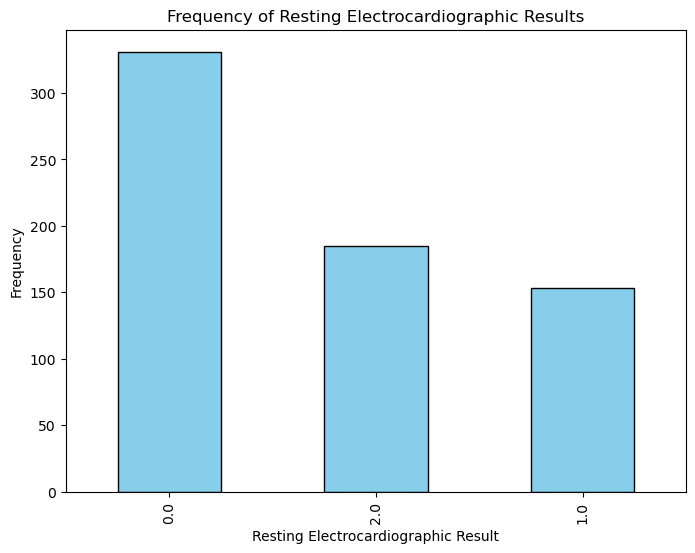

In [25]:
# Resting Electrocardiographic Results (restecg)
plt.figure(figsize=(8, 6))
heart_disease['restecg'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Resting Electrocardiographic Results")
plt.xlabel("Resting Electrocardiographic Result")
plt.ylabel("Frequency")
plt.show()

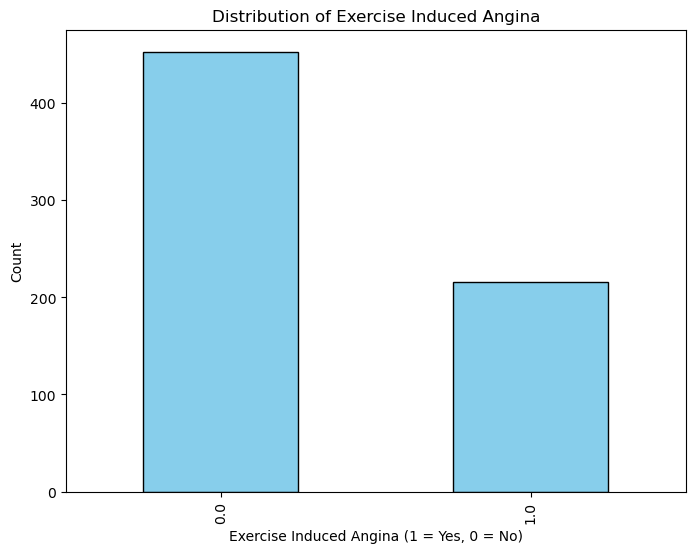

In [26]:
# Exercise Induced Angina (exang)
plt.figure(figsize=(8, 6))
heart_disease['exang'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Exercise Induced Angina")
plt.xlabel("Exercise Induced Angina (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

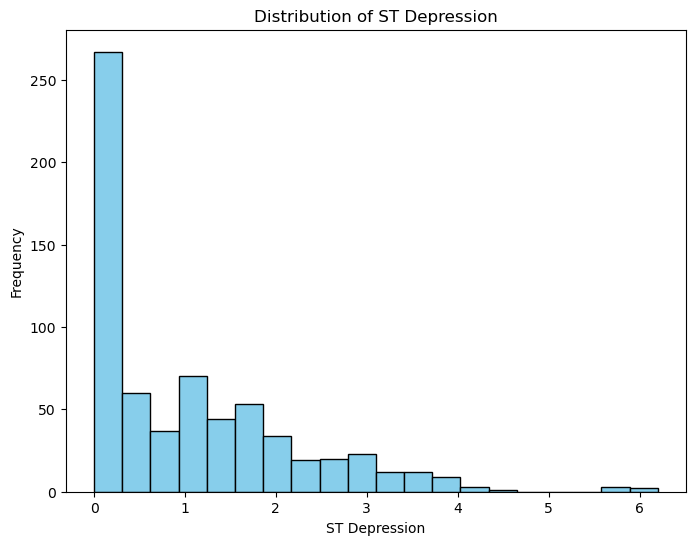

In [27]:
# ST Depression Induced by Exercise Relative to Rest (oldpeak)
plt.figure(figsize=(8, 6))
heart_disease['oldpeak'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of ST Depression")
plt.xlabel("ST Depression")
plt.ylabel("Frequency")
plt.show()

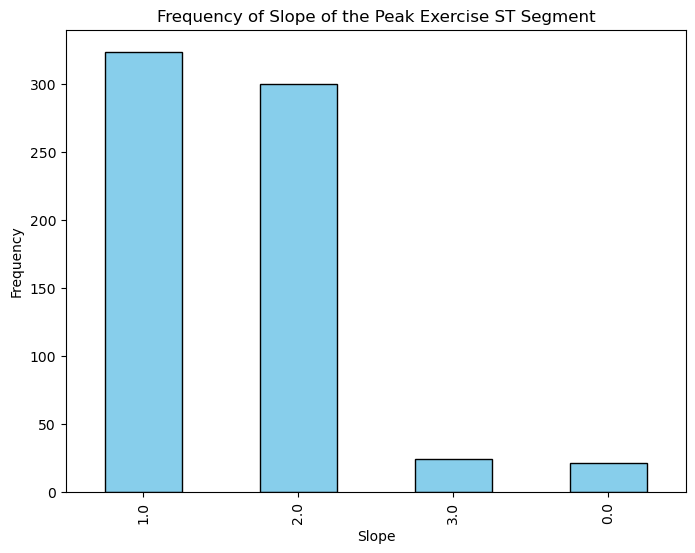

In [28]:
# Slope of the Peak Exercise ST Segment (slope)
plt.figure(figsize=(8, 6))
heart_disease['slope'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Slope of the Peak Exercise ST Segment")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()


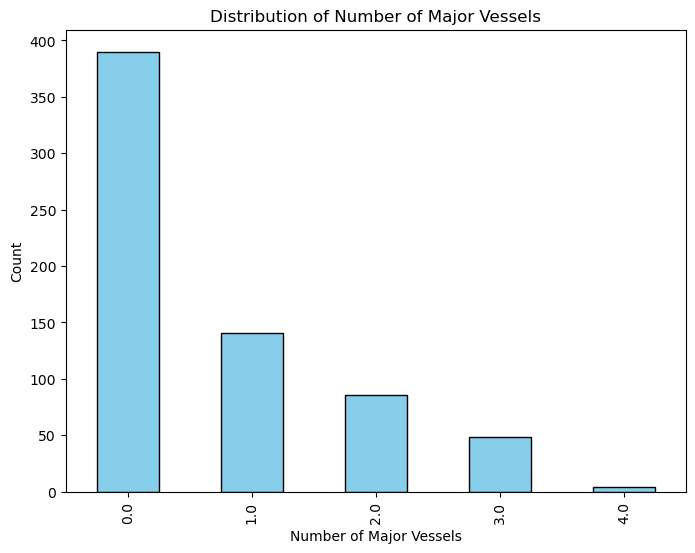

In [29]:
# Number of Major Vessels Colored by Flourosopy (ca)
plt.figure(figsize=(8, 6))
heart_disease['ca'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Number of Major Vessels")
plt.xlabel("Number of Major Vessels")
plt.ylabel("Count")
plt.show()

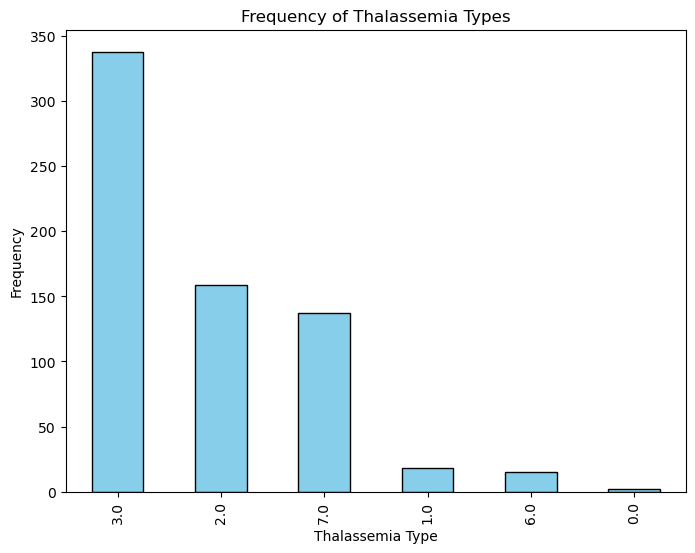

In [30]:
# Thalassemia (thal)
plt.figure(figsize=(8, 6))
heart_disease['thal'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Thalassemia Types")
plt.xlabel("Thalassemia Type")
plt.ylabel("Frequency")
plt.show()


Bivariate Analysis:

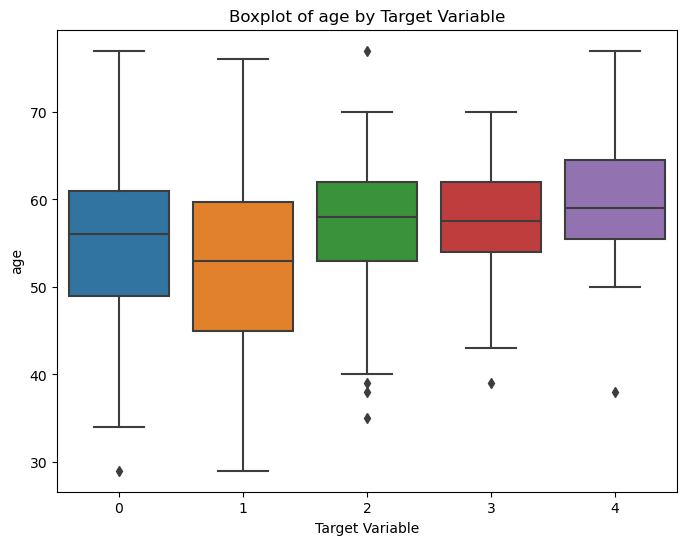

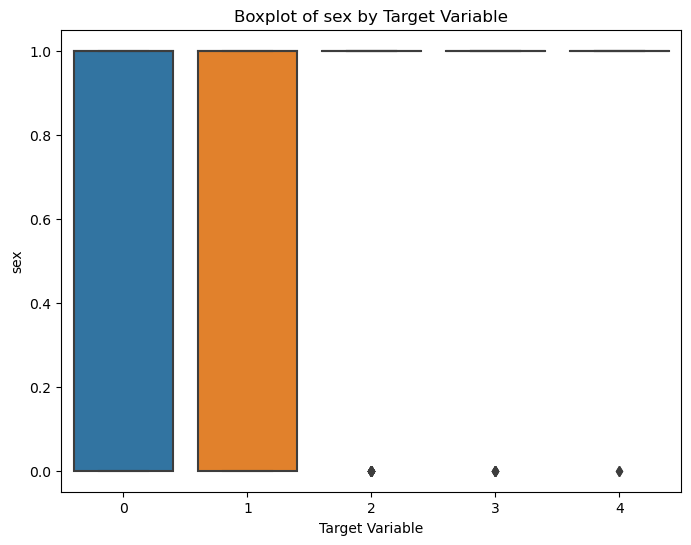

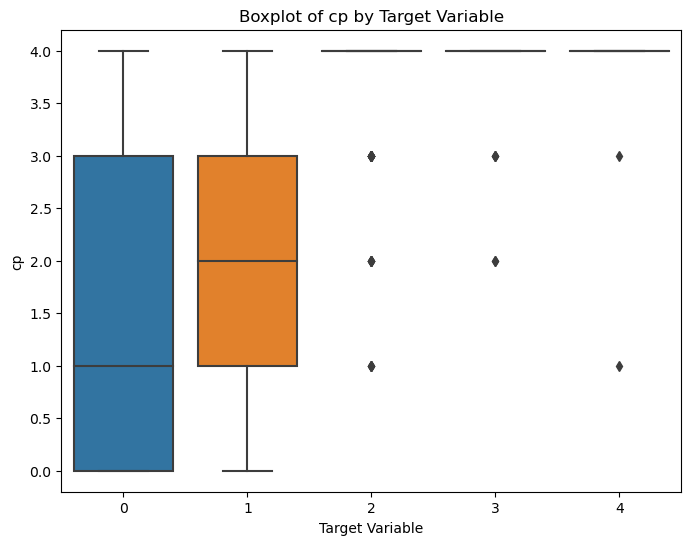

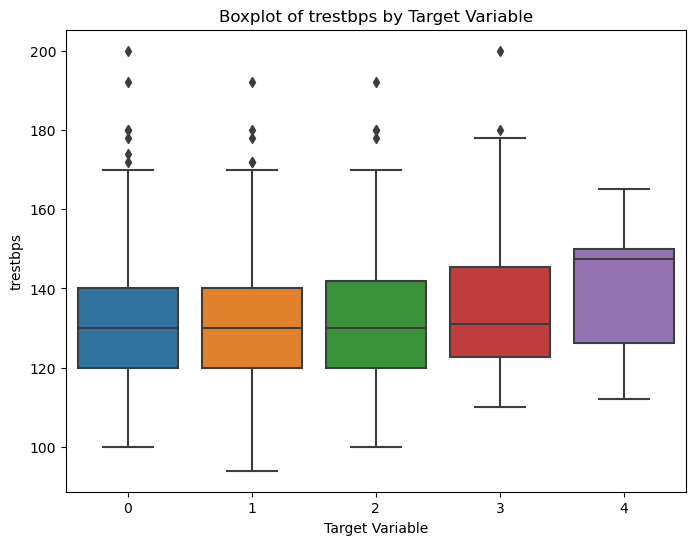

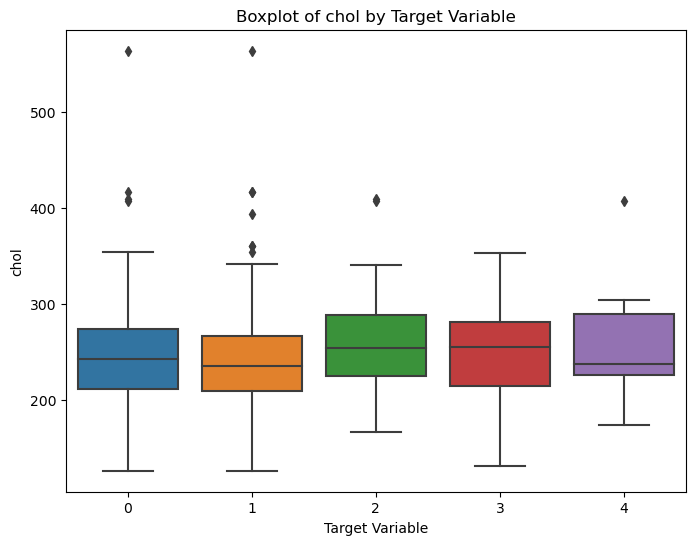

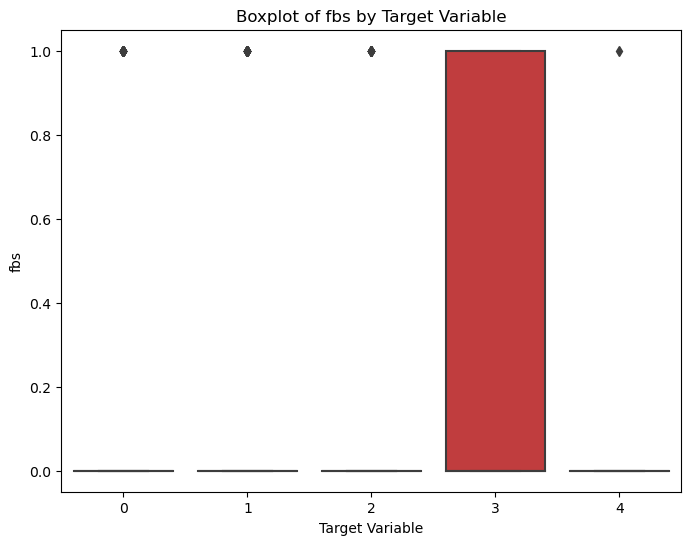

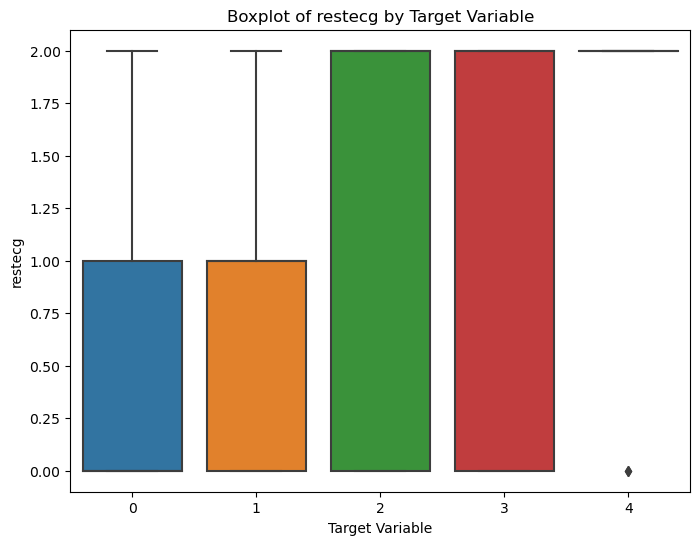

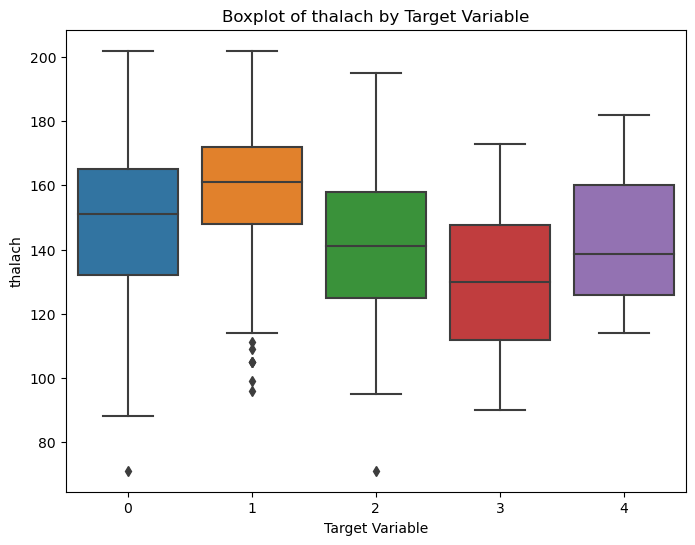

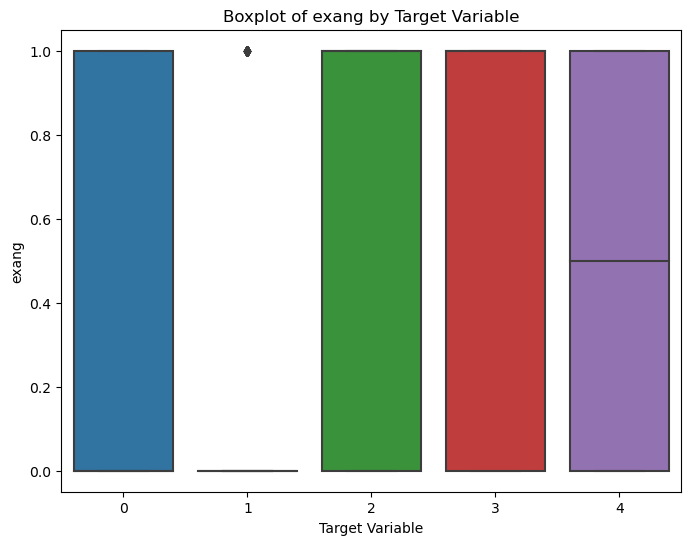

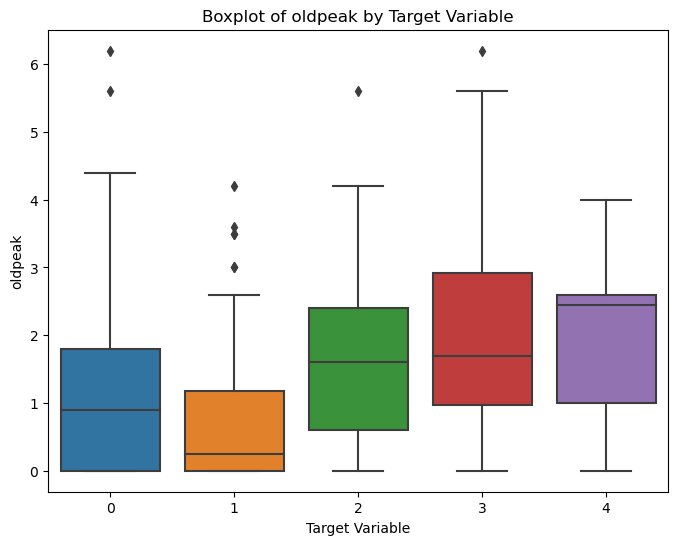

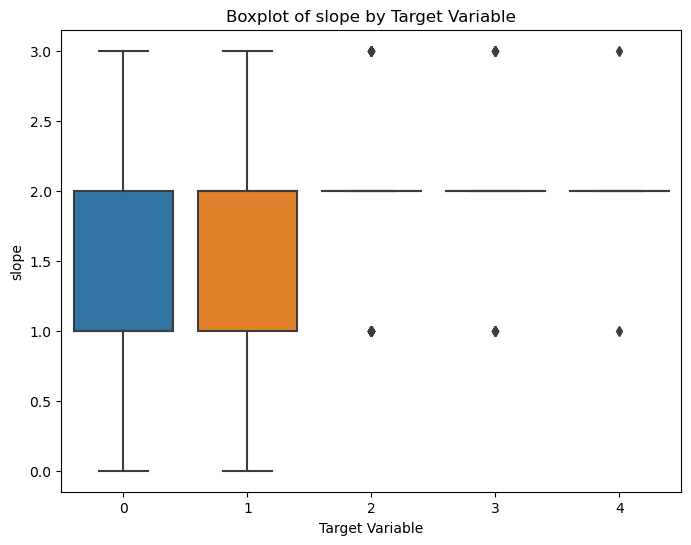

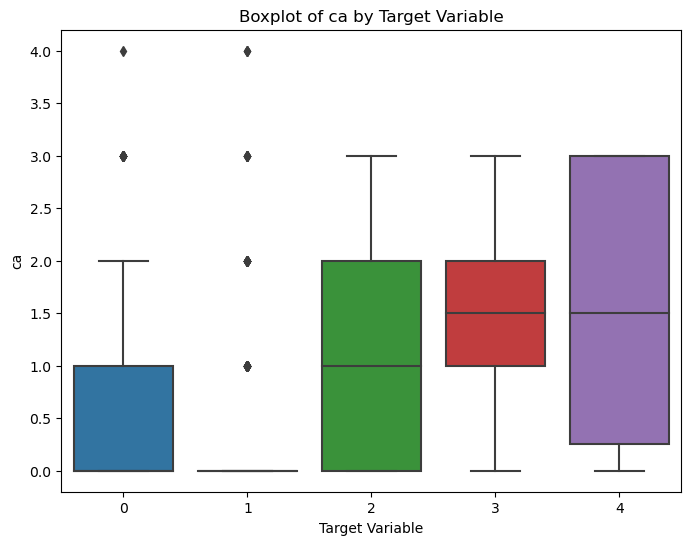

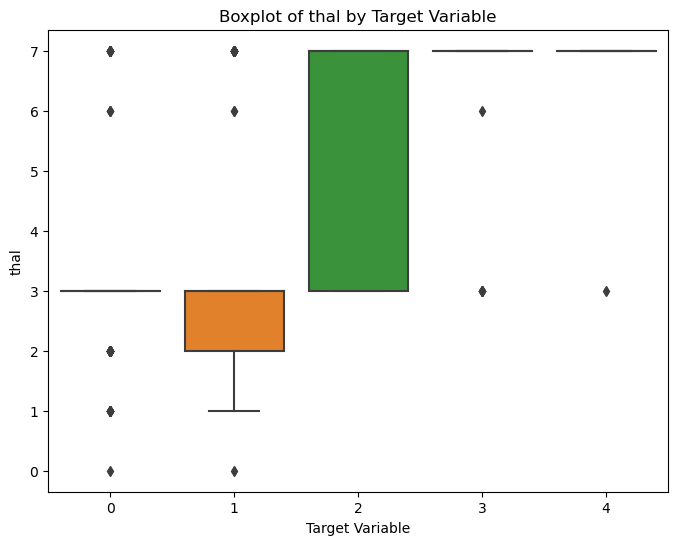

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bivariate analysis: Boxplot for each variable by target variable
for column in heart_disease.columns[:-1]:  # Exclude 'target' column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=column, data=heart_disease)
    plt.title("Boxplot of " + column + " by Target Variable")
    plt.xlabel("Target Variable")
    plt.ylabel(column)
    plt.show()


Multivariate Analysis

In [34]:
X = heart_disease.drop('target', axis=1)

# y contains the dependent variable
y = heart_disease['target']

# Feature importance

     Feature  Importance
2         cp    0.146494
12      thal    0.128687
11        ca    0.094751
9    oldpeak    0.090769
7    thalach    0.085606
0        age    0.070383
8      exang    0.070001
4       chol    0.067344
10     slope    0.064222
3   trestbps    0.061720
6    restecg    0.057995
1        sex    0.041355
5        fbs    0.020674


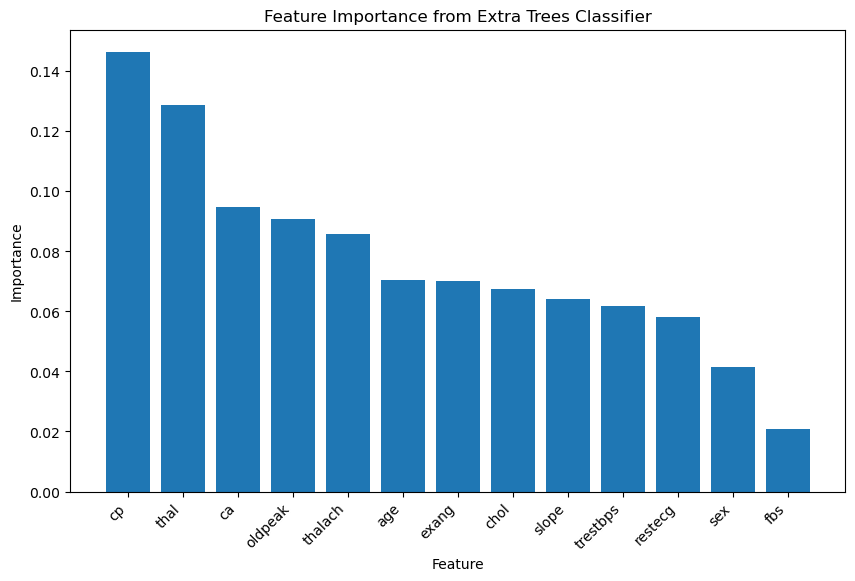

In [36]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Assuming heart_disease is your DataFrame
# X contains the independent variables
X = heart_disease_cleaned.drop('target', axis=1)

# y contains the dependent variable
y = heart_disease_cleaned['target']

# Create an Extra Trees Classifier instance
classifier = ExtraTreesClassifier()

# Fit the model to your training data
classifier.fit(X, y)

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame to better visualize the importances
importances_heart_disease = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importances_heart_disease = importances_heart_disease.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(importances_heart_disease)

# Plot a bar chart for better visualization
plt.figure(figsize=(10, 6))
plt.bar(importances_heart_disease['Feature'], importances_heart_disease['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Extra Trees Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()


# Splitting data

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Result

In [38]:
model_res = pd.DataFrame(columns=['model', 'score'])

# Decision trees

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Create an Extra Trees Classifier model
model = ExtraTreesClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_extra_trees = accuracy_score(y_test, y_pred)

# Update the results dataframe
model_res.loc[len(model_res)] = ['ExtraTreesClassifier', accuracy_extra_trees]

# Display the updated results dataframe
print(model_res)


                  model    score
0  ExtraTreesClassifier  0.67713


# Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_random_forest = accuracy_score(y_test, y_pred)

# Update the results dataframe
model_res.loc[len(model_res)] = ['RandomForestClassifier', accuracy_random_forest]

# Display the updated results dataframe
print(model_res)


                    model     score
0    ExtraTreesClassifier  0.677130
1  RandomForestClassifier  0.681614


# Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_gradient_boosting = accuracy_score(y_test, y_pred)

# Update the results dataframe
model_res.loc[len(model_res)] = ['GradientBoostingClassifier', accuracy_gradient_boosting]

# Display the updated results dataframe
print(model_res)


                        model     score
0        ExtraTreesClassifier  0.677130
1      RandomForestClassifier  0.681614
2  GradientBoostingClassifier  0.677130


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVM Classifier model
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred)

# Update the results dataframe
model_res.loc[len(model_res)] = ['SupportVectorMachine', accuracy_svm]

# Display the updated results dataframe
print(model_res)


                        model     score
0        ExtraTreesClassifier  0.677130
1      RandomForestClassifier  0.681614
2  GradientBoostingClassifier  0.677130
3        SupportVectorMachine  0.560538


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN Classifier model
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred)

# Update the results dataframe
model_res.loc[len(model_res)] = ['KNearestNeighbors', accuracy_knn]

# Display the updated results dataframe
print(model_res)


                        model     score
0        ExtraTreesClassifier  0.677130
1      RandomForestClassifier  0.681614
2  GradientBoostingClassifier  0.677130
3        SupportVectorMachine  0.560538
4           KNearestNeighbors  0.538117


In [45]:
import joblib

# Assuming best_model is your best performing model
best_model = RandomForestClassifier()

# Train your best_model

# Save the trained model as model_2
joblib.dump(best_model, 'model_2.pkl')


['model_2.pkl']

In [46]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
